## K-Means Clustering

This is a classic example of **unsupervised learning.** Take a look at sklean's explaination:

https://scikit-learn.org/1.5/modules/clustering.html#k-means

This is used for taking a dataset and grouping a variable number of similar entities within it.

Central concepts:

**interia**: simplified, this is a measurement of similarity within clusters (distance from the center of data in each group). You want your clusters to be as general (low interia) and limited (small number of clusters) as possible understanding that this is dependent on the context.

**centriods**: This is how k-means operates. By mapping all of the data points in vector space it looks for centers of certain clusters. A centroid would be the center of a specific group.

**elbow graph**: this is a graph that you output to try to assess what the optimal number (*k*) of clusters are. It's not always perfectly dependable, but generally the graph will take a hard turn, when cluster get to be too similar. That said, often we use trial and error to see what clusters are the most meaningful.

**uses**: this is used to cluster groups of text, handwritten digits, and many other data sets that are not pre-relabeled.


### K-means Clustering on Images for Palettes/Dominant Colors

Yes, we are jumping back into images!

This is a very simple way of engaging unsupervised learning, and assessing the process of clustering.

Below, I take us through the process of creating **color clusters** and for your homework, you'll be asked to run through this process, multiple times with multiple images and assess the outcomes.

The only new library that needs to be installed is the **CV2** library (computer vision). It is more powerful than Pillow in this context, and produces matrices of image colors that map well to K-means.

`pip install opencv-python`


**import you librarys**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

Load in the image with cv2

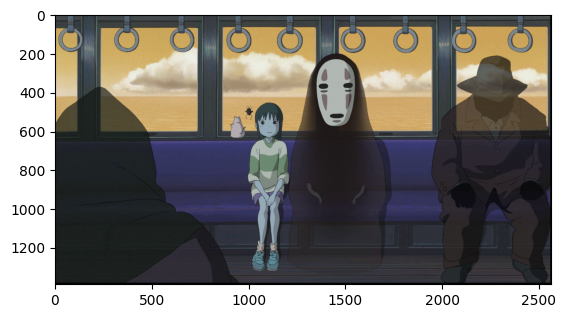

In [2]:
my_img = cv2.imread("spirited_away2.jpg")
plt.imshow(my_img)

Convert the colors:

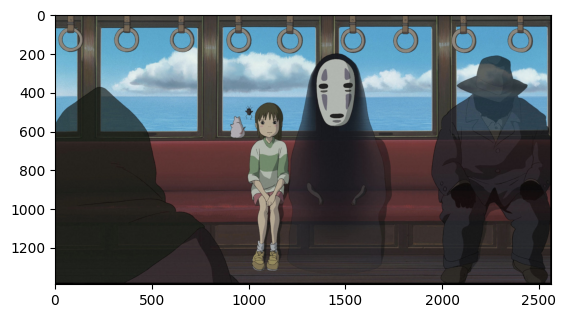

In [3]:
my_img=cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB)
plt.imshow(my_img)

Check the size (shape) of the image

In [4]:
print('Dimensions : ',my_img.shape)


Dimensions :  (1389, 2562, 3)


**Downsize (optional)**

If you have a particularly large image, you should use this method to downsize it.
If your image is under a megabyte, it should be fine but if you're noticing that the shape is greater than 2000 x 2000 it will be much more computationally quick to downsize it.

By default, I've set this up to downsize an image by half:
`fx=0.5, fy=0.5`

You can adjust the decimal point based on what you think will reduce the shape properly.

In [5]:


# my_img = cv2.resize(my_img, (0,0), fx=0.5, fy=0.5) 
# print('Dimensions : ',my_img.shape)
# plt.imshow(my_img)

**bringing the RGB values into a data frame**

In [6]:
df = pd.DataFrame(my_img.reshape(-1, 3),
                    columns=['R', 'G', 'B'])
df

R  G  B
0        1  0  2
1        1  0  2
2        3  1  2
3        1  0  0
4        1  0  0
...     .. .. ..
3558613  0  0  0
3558614  0  0  0
3558615  0  0  0
3558616  0  0  0
3558617  0  0  0

[3558618 rows x 3 columns]

#### Creating the elbow plot
Below, we extract the information into proper list format in order to run a test for inertia (separation between groups)

Generally, where the curve makes a hard turn and becomes less distant on the y-axis is where you want to try to cluster. But it's not a perfect measure. It gives you a decent idea.

That is why we are using images because your eyes will be a better judge of what the actual clusters of color might be.

In [7]:
#extracting a list from our data
img_data = df[['R', 'G', 'B']].values

**Running the inertia calculation**

**This will take some time**. It's mapping 20 clusters here so we can visualize where we should set a cluster number.

In [8]:
inerti=[]
for i in range(1,21):
  km=KMeans(n_clusters=i)
  km.fit(img_data)
  o=km.inertia_
  inerti.append(o)
print(inerti)

[37811852896.65044, 6224006756.616077, 4194058920.272272, 3195830078.240218, 1920135940.872416, 1672555419.5007045, 1381176949.0874727, 1238802431.272625, 981208705.2744684, 843326602.03697, 750847797.8179235, 690056954.9674088, 628130958.474179, 533187101.98734426, 509755608.6826247, 444027689.0216449, 425146484.5441344, 395760880.16268426, 429722592.20514166, 340007605.55296284]


Now we plot the outcome on an **elbow graph**

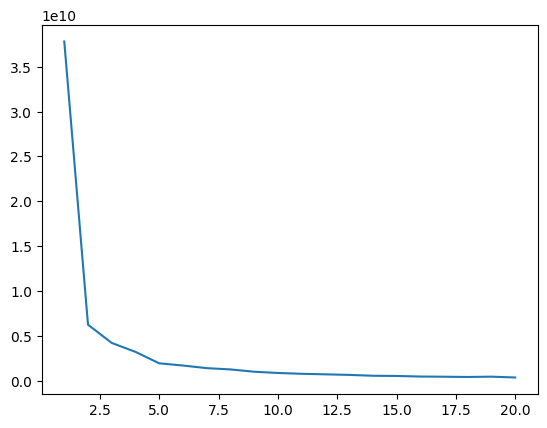

In [9]:
plt.plot(list(np.arange(1,21)),inerti)
plt.show()

Depending on the number we judge, and it's really a judgment call here, **set the number of clusters** and **run the algorithm.**

Note: while this elbow chart suggests 3 or 5 as the appropriate clusters, the human eye is better with color and in this specific case **8** looks by far the most accurate (it is the only one that give us that red that otherwise gets averaged into the blacks).

As with all ML approaches--trial and error, and thoughtful, human interpretation is the key!

In [46]:
from sklearn.cluster import KMeans
#set the cluster number
cluster_n = 8
# Compute kmeans
X = df.iloc[:,0:3].values
km = KMeans(n_clusters = cluster_n, init = 'k-means++')
y = km.fit_predict(X)

Add the clusters to our dataframe

In [47]:
df['cluster'] = y  

df

R  G  B  cluster  R_centroid  G_centroid  B_centroid
0        1  0  2        1    0.145511    0.131256    0.130673
1        1  0  2        1    0.145511    0.131256    0.130673
2        3  1  2        1    0.145511    0.131256    0.130673
3        1  0  0        1    0.145511    0.131256    0.130673
4        1  0  0        1    0.145511    0.131256    0.130673
...     .. .. ..      ...         ...         ...         ...
3558613  0  0  0        1    0.145511    0.131256    0.130673
3558614  0  0  0        1    0.145511    0.131256    0.130673
3558615  0  0  0        1    0.145511    0.131256    0.130673
3558616  0  0  0        1    0.145511    0.131256    0.130673
3558617  0  0  0        1    0.145511    0.131256    0.130673

[3558618 rows x 7 columns]

Now we want to isolate the **centroids** which are the mathematical centers of each cluster.

We are going to hold it in a couple different formats so that we can graph this in a few different ways.

In [48]:

centroid_array=km.cluster_centers_ #need this for later
centroids = centroid_array.tolist()
centroids

[[123.38834992587726, 123.03079855963267, 111.9621750839766],
 [31.082129213439345, 29.00246578600175, 27.559645708356506],
 [199.69483471736103, 221.25596625403816, 229.24258937074416],
 [102.84105139070398, 169.99370632967236, 206.06787763449734],
 [67.58526003068641, 71.24854243801347, 70.8338126012076],
 [51.2192905423139, 44.76533429254617, 46.1603263280452],
 [162.5576022434215, 183.0984176849956, 190.03148729898223],
 [93.28987245779528, 52.838562564616154, 52.82512581868729]]

In [49]:
centroid_array

array([[123.38834993, 123.03079856, 111.96217508],
       [ 31.08212921,  29.00246579,  27.55964571],
       [199.69483472, 221.25596625, 229.24258937],
       [102.84105139, 169.99370633, 206.06787763],
       [ 67.58526003,  71.24854244,  70.8338126 ],
       [ 51.21929054,  44.76533429,  46.16032633],
       [162.55760224, 183.09841768, 190.0314873 ],
       [ 93.28987246,  52.83856256,  52.82512582]])

These are groups of RGB values.

Below, we convert them to decimal values (i.e. from 0 255 to 0 to 1) also, so we can graph them.

In [50]:
for centroid in centroids:
    (X, Y, Z) = centroid[0], centroid[1], centroid[2] 
    centroid[0] = X/255
    centroid[1] = Y/255
    centroid[2] = Z/255

centroids

[[0.4838758820622638, 0.48247371984169674, 0.4390673532704965],
 [0.12189070279780136, 0.1137351599451049, 0.10807704199355492],
 [0.7831169988916119, 0.8676704558981888, 0.8989905465519379],
 [0.40329824074785875, 0.6666419856065583, 0.8081093240568523],
 [0.26504023541445654, 0.2794060487765234, 0.27777965725963766],
 [0.2008599629110349, 0.1755503305590046, 0.18102088756096157],
 [0.6374807931114569, 0.7180330105293945, 0.7452215188195381],
 [0.36584263708939324, 0.20721004927300452, 0.20715735615171488]]

Now we add those values to our data frame!

In [51]:
for i in range(cluster_n):
    df.loc[df['cluster']==i, 'R_centroid'] = centroids[i][0]
    df.loc[df['cluster']==i, 'G_centroid'] = centroids[i][1]
    df.loc[df['cluster']==i, 'B_centroid'] = centroids[i][2]

df

R  G  B  cluster  R_centroid  G_centroid  B_centroid
0        1  0  2        1    0.121891    0.113735    0.108077
1        1  0  2        1    0.121891    0.113735    0.108077
2        3  1  2        1    0.121891    0.113735    0.108077
3        1  0  0        1    0.121891    0.113735    0.108077
4        1  0  0        1    0.121891    0.113735    0.108077
...     .. .. ..      ...         ...         ...         ...
3558613  0  0  0        1    0.121891    0.113735    0.108077
3558614  0  0  0        1    0.121891    0.113735    0.108077
3558615  0  0  0        1    0.121891    0.113735    0.108077
3558616  0  0  0        1    0.121891    0.113735    0.108077
3558617  0  0  0        1    0.121891    0.113735    0.108077

[3558618 rows x 7 columns]

**3-D Plot of the clusters**
Here we are going to plot the different clusters in 3-D space.

This is a decent way of visualizing what's happening when we are clustering.

(This also takes a bit of time!)


In [52]:
import matplotlib.pyplot as plt


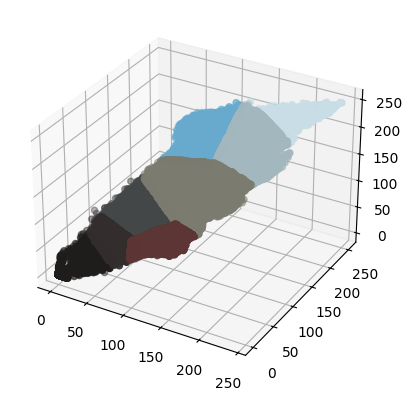

In [55]:

kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')

for i in range(cluster_n):
    cluster = df[df.cluster==i]
    cluster_color = cluster[["R_centroid", "G_centroid", "B_centroid"]].values.tolist()
    kplot.scatter3D(cluster.R, cluster.G, cluster.B, facecolors=cluster_color)

plt.axis('on')
plt.show()

**visualizing percentiles of each cluster**

Here we get out the different labels from the clustering algorithm, and then we make a pie chart showing the dominance of the different colors groups.

In [53]:
# print(centroid)
labels=km.labels_
print(labels)
labels=list(labels)

[1 1 1 ... 1 1 1]


[0.046612758098790036, 0.25293133457988465, 0.0340078648509056, 0.14713352205828217, 0.1391326632979432, 0.2401336698684714, 0.0585378930809657, 0.08151029416475722]


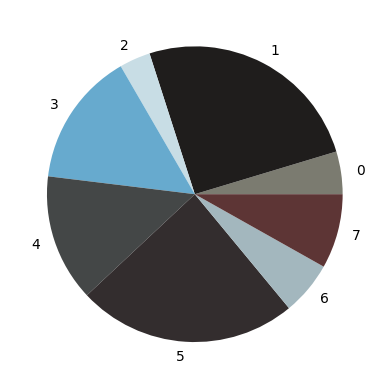

In [54]:
percent=[]
for i in range(len(centroid_array)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)
plt.pie(percent,colors=np.array(centroid_array/255),labels=np.arange(len(centroid_array)))
plt.show()


**getting a simplified data frame** that shows the information for our clusters.

In [56]:
each_cluster = df.groupby('cluster').first()
each_cluster

R    G    B  R_centroid  G_centroid  B_centroid
cluster                                                   
0        113  104   89    0.483876    0.482474    0.439067
1          1    0    2    0.121891    0.113735    0.108077
2        161  208  224    0.783117    0.867670    0.898991
3         95  139  164    0.403298    0.666642    0.808109
4         74   72   73    0.265040    0.279406    0.277780
5         59   56   49    0.200860    0.175550    0.181021
6        170  160  159    0.637481    0.718033    0.745222
7         86   72   59    0.365843    0.207210    0.207157

Generating an output so we can see the colors' HEX values and **see the pallette**

In [57]:
#we the color values
palette_list = each_cluster[["R_centroid", "G_centroid", "B_centroid"]].values.tolist()
palette_list

[[0.4838758820622638, 0.48247371984169674, 0.4390673532704965],
 [0.12189070279780136, 0.1137351599451049, 0.10807704199355492],
 [0.7831169988916119, 0.8676704558981888, 0.8989905465519379],
 [0.40329824074785875, 0.6666419856065583, 0.8081093240568523],
 [0.26504023541445654, 0.2794060487765234, 0.27777965725963766],
 [0.2008599629110349, 0.1755503305590046, 0.18102088756096157],
 [0.6374807931114569, 0.7180330105293945, 0.7452215188195381],
 [0.36584263708939324, 0.20721004927300452, 0.20715735615171488]]

#7b7b70


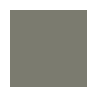

#1f1d1c


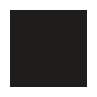

#c8dde5


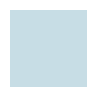

#67aace


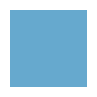

#444747


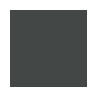

#332d2e


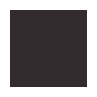

#a3b7be


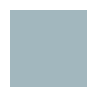

#5d3535


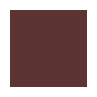

In [58]:
#display the colorsa and hex values
from matplotlib.colors import to_hex
for color in palette_list:
    # color_array = [x/255 for x in color[0][0]]
    print(to_hex(color))
    plt.figure(figsize=(1, 1))
    plt.axis('off')
    plt.imshow([[color]]);
    plt.show();

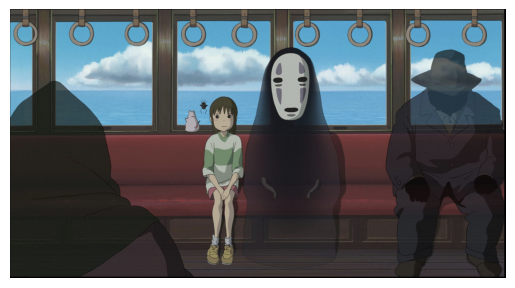

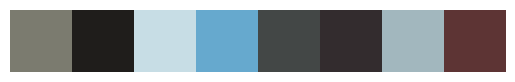

In [59]:
#display the image and colors
palette2 = np.array(palette_list)[np.newaxis, :, :]

plt.imshow(my_img);
plt.axis('off')
plt.show()
plt.imshow(palette2)
plt.axis('off')
plt.show()


The end!